## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문과정

### 교과목명 : 통계
- 평가일 : 22.2.4
- 성명 : 김기현
- 점수 :

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [30]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


df = pd.read_csv('D:\python\cakd5\m3_통계\data\ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [31]:
des = df['mathematics'].describe()
des

print('평균 :', des[1])
print('중앙값 :', des[5])
print('최빈값 :', list(df['mathematics'].mode()))
print('분산 :', np.square(des[2]))
print('표준편차 :', des[2])
print('범위:', des[7] - des[3])
print('IQR:', des[6] - des[4])

평균 : 78.88
중앙값 : 80.0
최빈값 : [77, 82, 84]
분산 : 70.80163265306125
표준편차 : 8.414370603500968
범위: 37.0
IQR: 8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [32]:
a = (df['english'] - df['english'].mean()) / np.std(df['english'])
np.array(a)[:5]

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869])

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

In [33]:
score = df.english
type(score)

pandas.core.series.Series

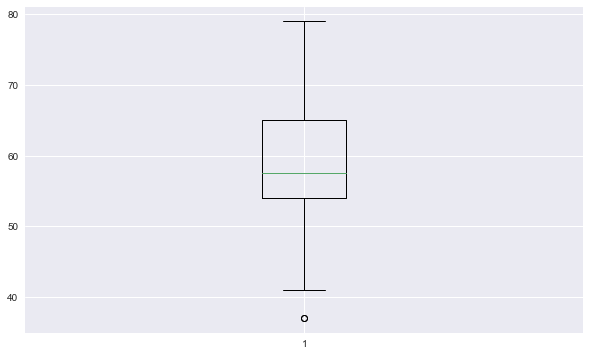

In [34]:
plt.figure(figsize = (10, 6))

plt.boxplot(score)
plt.show()

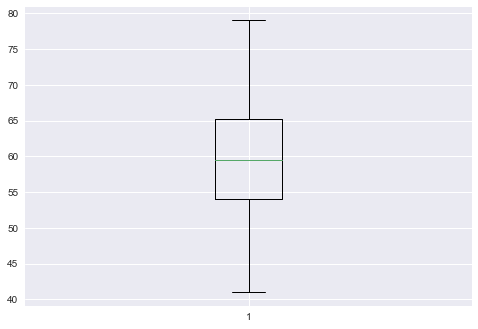

In [35]:
Q1 = np.percentile(score, [25, 75])[0]
Q3 = np.percentile(score, [25, 75])[1]

re_score = score[score >= Q1 - 1.5*(Q3 - Q1)]

plt.boxplot(re_score)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [36]:
import numpy as np
import pandas as pd
df = pd.read_csv('D:\python\cakd5\m3_통계\data\ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


공분산: 69.78
상관계수: 0.82


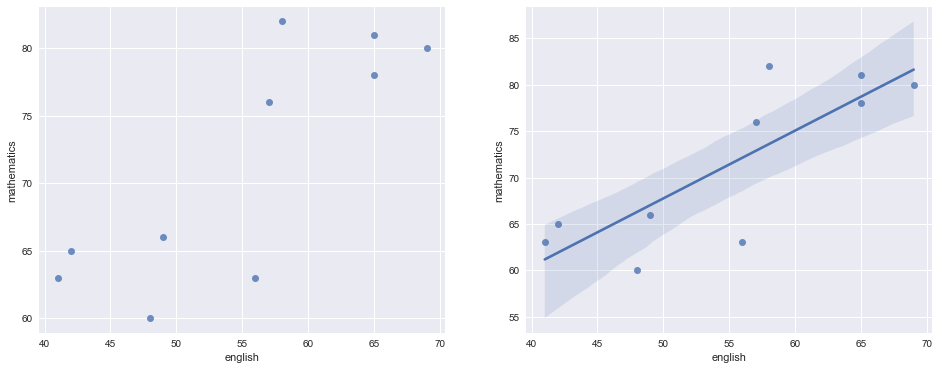

In [37]:
print('공분산:', np.cov(scores_df.english, scores_df.mathematics)[0, 1].round(2))
print('상관계수:', np.corrcoef(scores_df.english, scores_df.mathematics)[0, 1].round(2))

fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(121)
sns.regplot(x = scores_df.english, y = scores_df.mathematics, fit_reg = False)
ax2 = fig.add_subplot(122)
sns.regplot(x = scores_df.english, y = scores_df.mathematics, fit_reg = True)
plt.show()

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [38]:
df = pd.read_csv('D:\python\cakd5\m3_통계\data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

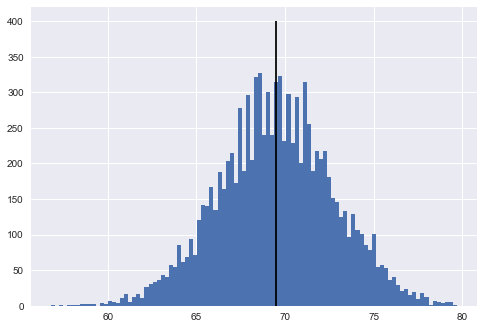

In [39]:
plt.style.use('seaborn')
sample = np.random.choice(scores, size = (10000, 20))
plt.hist(np.mean(sample, axis = 1), bins = 100)
plt.vlines(np.mean(sample, axis = 1).mean(), 0, 400, color = 'black')
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [40]:
def E(X, g = lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g = lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'기대값 : {E(X):.3}')
    print(f'분산 : {V(X):.4}')

In [41]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

p = 0.5
X = Bern(p)

check_prob(X)

기대값 : 0.5
분산 : 0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [42]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p) ** (n-x)
        else:
            return 0
    return x_set, f

n = 10
p = 0.5
X = Bin(n, p)

check_prob(X)

기대값 : 5.0
분산 : 2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [43]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

lam = 2
X = Poi(lam)

check_prob(X)

기대값 : 2.0
분산 : 2.0


Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

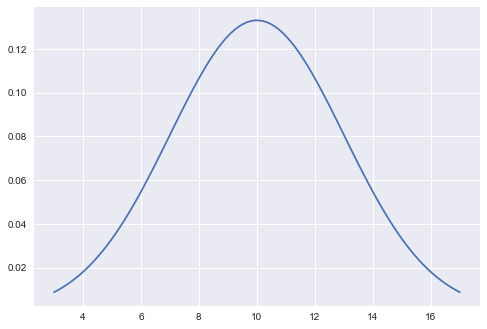

In [44]:
rv = stats.norm(10, 3)

xs = np.linspace(3, 17, 100)
plt.plot(xs, rv.pdf(xs))

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

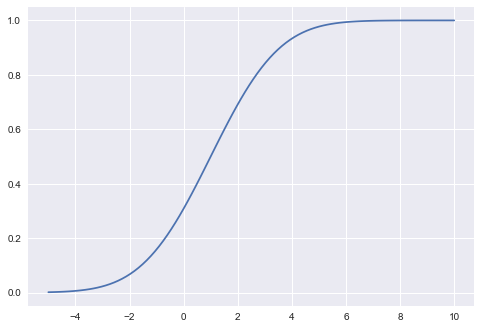

In [45]:
rv = stats.norm(1, 2)

xs = np.linspace(-5, 10, 100)
plt.plot(xs, rv.cdf(xs))

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [46]:
df1 = pd.read_csv('D:\python\cakd5\m3_통계\data/5_2_fm.csv')
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [47]:
df2 = df1.copy()
df2.loc[df2['species'] == 'A', 'species'] = 'C'
df2.loc[df2['species'] == 'B', 'species'] = 'D'
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [48]:
df2.loc[df2['species'] == 'C', 'length'] = df2.loc[df2['species'] == 'C', 'length'].apply(lambda x: x *2)
df2.loc[df2['species'] == 'D', 'length'] = df2.loc[df2['species'] == 'D', 'length'].apply(lambda x: x* 3)

In [49]:
df = pd.concat([df1, df2], axis = 0)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,4
1,C,6
2,C,8
3,D,18


In [50]:
for i in list('ABCD'):
    mean = df.loc[df['species'] == i, 'length'].mean()
    std = df.loc[df['species'] == i, 'length'].std()
    print(f'{i}의 평균 : {mean}, 표준편차 : {std}')

A의 평균 : 3.0, 표준편차 : 1.0
B의 평균 : 8.0, 표준편차 : 2.0
C의 평균 : 6.0, 표준편차 : 2.0
D의 평균 : 24.0, 표준편차 : 6.0


Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [51]:
import pandas as pd
shoes = pd.read_csv("D:\python\cakd5\m3_통계\data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [52]:
titanic = pd.read_csv('D:\python\cakd5\m3_통계\data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [53]:
sample_size = 10

sample = stats.norm(4, 0.8).rvs((10000, sample_size))
sample_mean = np.mean(sample, axis = 1)
sample_mean[:10]

array([4.01737097, 4.70552228, 4.07523355, 3.799643  , 3.89246611,
       4.2287238 , 3.88924507, 4.24492243, 4.1769484 , 4.17198832])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

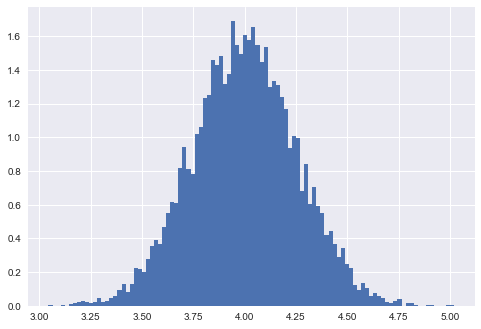

In [54]:
plt.hist(sample_mean, bins = 100, density = True)
plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

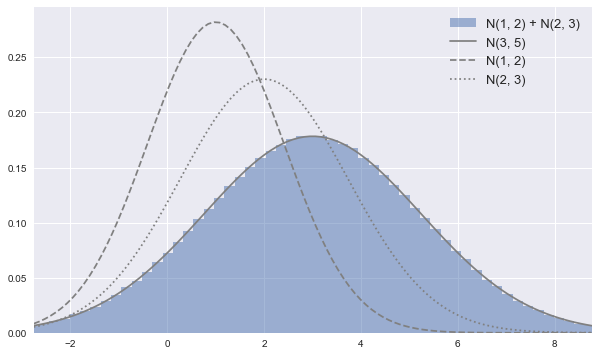

In [55]:
np.random.seed(0)

rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

plt.figure(figsize = (10, 6))
rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

plt.hist(sum_sample, bins = 100, density = True, alpha = 0.5, label = 'N(1, 2) + N(2, 3)')
plt.plot(xs, rv.pdf(xs), label ='N(3, 5)', color = 'gray')
plt.plot(xs, rv1.pdf(xs), label = 'N(1, 2)', ls = '--', color = 'gray')
plt.plot(xs, rv2.pdf(xs), label = 'N(2, 3)', ls = ':', color = 'gray')

plt.legend(fontsize = 13)
plt.xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

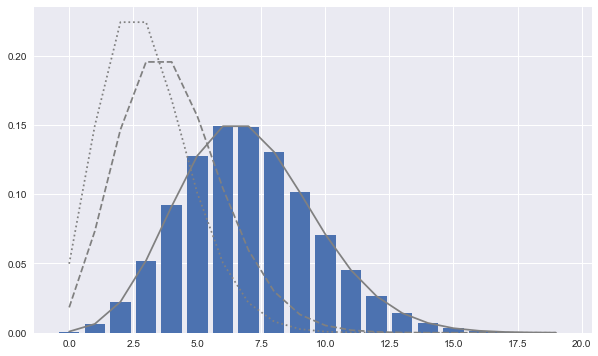

In [56]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

plt.figure(figsize = (10, 6))

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins = 20, range = (0, 20), density = True)

plt.bar(xs, hist, label = 'Poi(3) + Poi(4)')
plt.plot(xs, rv.pmf(xs), label = 'Poi(7)', color = 'gray')
plt.plot(xs, rv1.pmf(xs), label = 'Poi(3)', ls = ':', color = 'gray')
plt.plot(xs, rv2.pmf(xs), label = 'Poi(4)', ls = '--', color = 'gray')

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

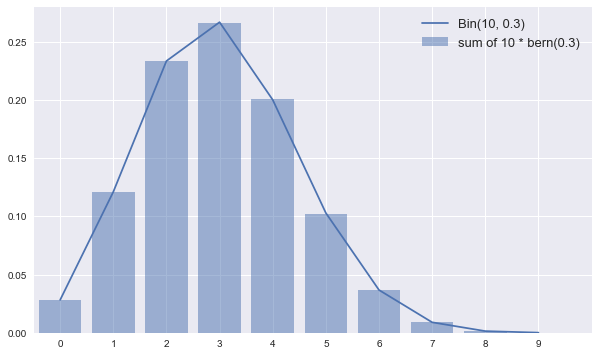

In [57]:
np.random.seed(0)
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis = 0)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins = 10, range = (0, 10), density = True)
plt.bar(xs, hist, alpha = 0.5, label = 'sum of 10 * bern(0.3)')
plt.plot(xs, rv.pmf(xs), label = 'Bin(10, 0.3)')
plt.legend(fontsize = 13)
plt.xlim(-0.5, 10)
plt.xticks(np.arange(10))
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

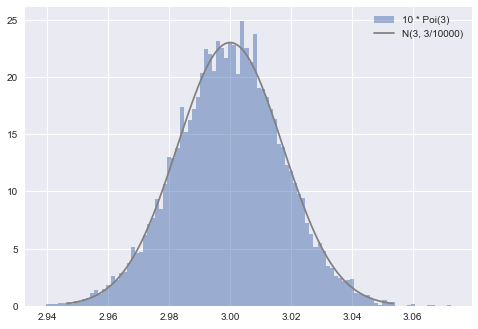

In [60]:
lam = 3
rv = stats.poisson(lam)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

rv_true = stats.norm(lam, np.sqrt(lam/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

plt.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = '10 * Poi(3)')
plt.plot(xs, rv_true.pdf(xs), label = 'N(3, 3/10000)', color = 'gray')
plt.legend()
plt.show()

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. (모분산 9, 유의수준 0.05)

In [61]:
df = pd.read_csv('D:\python\cakd5\m3_통계\data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [73]:
# 검정통계량

s_mean = np.mean(df['무게'])
z = (s_mean - 130) / np.sqrt(9/14)
print(z)

# 임계값

rv = stats.norm()
print(rv.isf(0.95))

# p값

print(rv.cdf(z))

# 검정통계량 > 임계값 : 따라서 귀무가설은 기각되고 평균은 130g보다 작다.
# 유의수준 0.05 > p값 : 따라서 귀무가설은 기각되고 평균은 130g보다 작다.

-1.932298779026813
-1.6448536269514722
0.026661319523126635
